# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from tqdm.auto import tqdm

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Сиды фиксируются для того чтобы при каждом повторном запуске программы результаты не варьировались. Это может быть связано с тем, 

что когда мы делим наши данные на обучающую и тестовую выборку это делается рандомно в определенном (заданном) процентном соотношении.

Когда мы фиксируем сид, то рандомная функция будет выдавать один и тот же порядок разбивки данных

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
# Отобразим 10 случайных строк тренировочного датасета
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [4]:
# Отобразим первые 5 и последние 5 объектов тестового датасета
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [5]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

### Посмотреть есть ли в датасете пропуски. Выведем названия колонок в которых присутствуют пропуски

Определить наличие пропусков в данных можно с помощью метода `info()`. Но этот метод не позволяет точно локализовать места пропущенных значений, он выводит только число непустых значений и предназначен для определения факта наличия пропусков:

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


По данным вышестоящей таблицы мы можем увидеть, что пропуски в тестовой выборке
присутствуют в следующих колонках: `mileage`, `engine`, `max_power`, `torque`, `seats`

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


По данным вышестоящей таблицы мы можем увидеть, что пропуски в тренировочной выборке
присутствуют в следующих колонках: `mileage`, `engine`, `max_power`, `torque`, `seats`

Иногда пропуски могут быть **скрыты**. В библиотеке *pandas*  специально для этого реализован метод `isnull()`. Этот метод возвращает новый *DataFrame*, в ячейках которого стоят булевы значения *True*, *False*. *True* ставится на месте, где ранее находилось значение *NaN*

Посмотрим на результат работы метода на нашей таблице:

In [8]:
display(df_train.isnull())

name   year  selling_price  km_driven   fuel  seller_type  \
0     False  False          False      False  False        False   
1     False  False          False      False  False        False   
2     False  False          False      False  False        False   
3     False  False          False      False  False        False   
4     False  False          False      False  False        False   
...     ...    ...            ...        ...    ...          ...   
6994  False  False          False      False  False        False   
6995  False  False          False      False  False        False   
6996  False  False          False      False  False        False   
6997  False  False          False      False  False        False   
6998  False  False          False      False  False        False   

      transmission  owner  mileage  engine  max_power  torque  seats  
0            False  False    False   False      False   False  False  
1            False  False    False   False      False   False  False  
2            False  False    False   False      False   False  False  
3            False  False    False   False      False   False  False  
4            False  False    False   False      False   False  False  
...            ...    ...      ...     ...        ...     ...    ...  
6994         False  False    False   False      False   False  False  
6995         False  False    False   False      False   False  False  
6996         False  False    False   False      False   False  False  
6997         False  False    False   False      False   False  False  
6998         False  False    False   False      False   False  False  

[6999 rows x 13 columns]

Наша таблица визулально не дала нам хороших результатов. По ней мы не увидели колонки со значениями *True* где раннее были пропуски. Метод `isnull()` - это мягко говоря, не самый удобный метод поиска пропусков, однако он является промежуточным этапом других способов.

### Список столбцов с пропусками

Первый способ - выведем на экран названия столбцов, где число пропусков больше 0.

Для этого вычислим средний по столбцам результат метода `isnull ()`. Получим долю пропусков в каждом **столбце**.

Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [9]:
train_cols_null_percent = df_train.isnull().mean() * 100
train_cols_with_null = train_cols_null_percent[train_cols_null_percent > 0].sort_values(ascending=False)
display(train_cols_with_null)

torque       2.900414
mileage      2.886127
engine       2.886127
seats        2.886127
max_power    2.800400
dtype: float64

In [10]:
test_cols_null_percent = df_test.isnull().mean() * 100
test_cols_with_null = test_cols_null_percent[test_cols_null_percent > 0].sort_values(ascending=False)
display(test_cols_with_null)

mileage      1.9
engine       1.9
max_power    1.9
torque       1.9
seats        1.9
dtype: float64

В нашем случае столбцов с пропусками не так много, но бывают случаи когда их станет слишком много и прочитать информацию о них из списка признаков с цифрами станет слишком затруднительно - цифры начнут сливаться воедино.

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её - использовать метод `plot()`

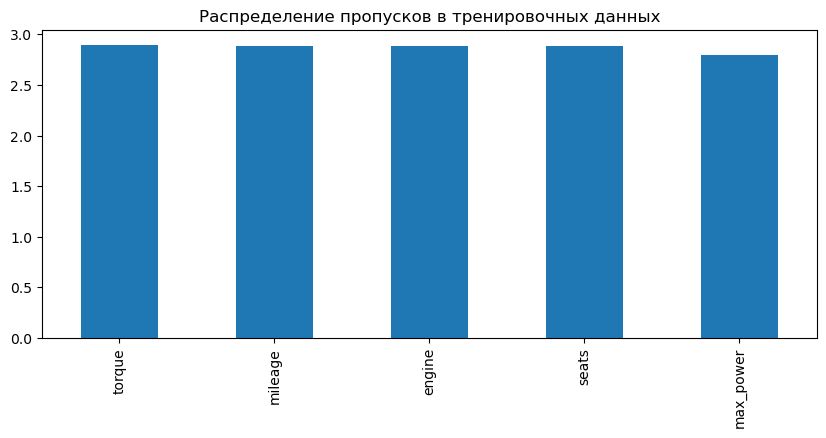

In [11]:
train_cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в тренировочных данных'
);

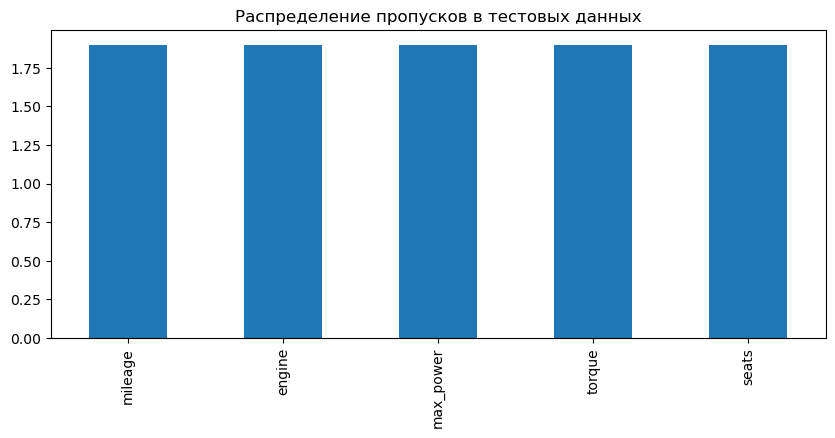

In [12]:
test_cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в тестовых данных'
);

На диаграмме мы видим те же соотношения, что и раньше, но представленные в удобном для визуального восприятия формате

### Посмотреть, есть ли в данных явные дубликаты

**Дубликатами** называют записи, для которых значение (всех или большинства) признаков совпадают.

Иногда дубликаты тщательно скрываются в данных и необходимо приложить немало усилий, чтобы их отыскать.

**ЧЕМ ОПАСНЫ ДУБЛИКАТ?**

В *Data Science* одинаковые записи не несут полезной информации и искажают реальную статистику. Модель несколько раз видит одно и то же наблюдение и начинает подстравиваться под него. Если дубликатов много, это может стать большой проблемой при обучении.

Чтобы отследить дубликаты, можно воспользоваться методом `duplicated()`, который возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает `True`, для отсальных - `False`

У метода есть параметр `subset()` - список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в *DataFrame* и ищутся **полные дубликаты**

Найдем число полных дубликатов в наших таблицах `df_test` и `df_train`. Предварительно создадим список столбцов *test_dupl_columns* и *train_dupl_columns*, по которым будем искать совпадения

Создадим маску дубликатов с помощью метода `duplicated()` и произведём фильтрацию. Результат заносим в переменные *df_test_duplicates* и *df_train_duplicates*. Выведем число строк в результирующем *DataFrame:*

In [13]:
test_dupl_columns = list(df_test.columns)

mask_test = df_test.duplicated(subset=test_dupl_columns)
df_test_duplicates = df_test[mask_test]
print(f"Число найденных дубликатов на тестовых данных: {df_test_duplicates.shape[0]}")

Число найденных дубликатов на тестовых данных: 62


In [14]:
train_dupl_columns = list(df_train.columns)

mask_train = df_train.duplicated(subset=train_dupl_columns)
df_train_duplicates = df_train[mask_train]
print(f"Число найденных дубликатов на тренировочных данных: {df_train_duplicates.shape[0]}")

Число найденных дубликатов на тренировочных данных: 985


Итак, 62 строк в тестовых данных и 985 строк в тренировочных данных являются полными копиями других записей.

### Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

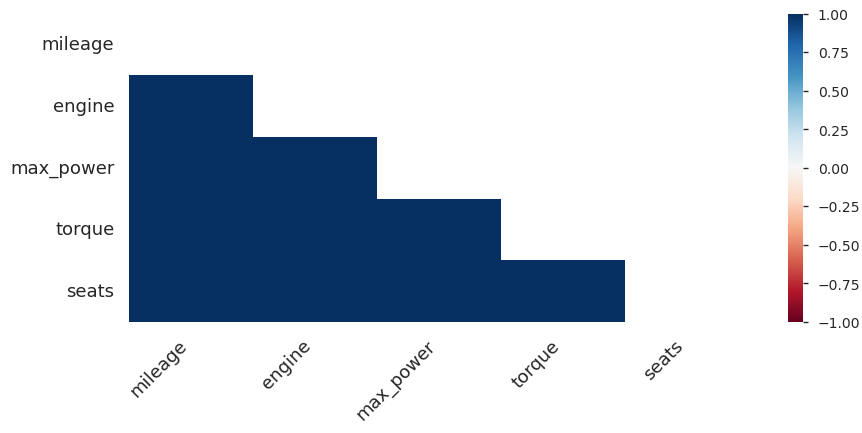

In [15]:
from ydata_profiling import ProfileReport
profile_report = ProfileReport(df_test, title='Pandas Profiling Report')
profile_report

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Удалим столбец `torque` в тренировочных и тестовых данных

In [16]:
df_train = df_train.drop(labels='torque', axis = 1)
df_test = df_test.drop(labels='torque', axis = 1)

Уберем единицы измерения для признаков `mileage, engine, max_power`

In [17]:
# Преждем чем уберем единицы измерения столбцов, мы их вынесем в названия колонок
df_train.rename(columns={'mileage':'mileage, [kmpl]', 'engine':'engine, [CC]', "max_power":"max_power, [bhp]"}, inplace=True)

In [18]:
df_test.rename(columns={'mileage':'mileage, [kmpl]', 'engine':'engine, [CC]', "max_power":"max_power, [bhp]"}, inplace=True)

In [19]:
# Напишем функцию которая удаляет единицы измерения и оставляет только численные значения, и приводит типы данных к типу float
import re

def extract_numbers(column):
    if pd.notnull(column):
        numbers = re.findall(r'-?\d+\.?\d*', column)
        return float(numbers[0]) if numbers else np.nan
    else: return column

In [20]:
# Тренировочные данные
df_train['mileage, [kmpl]'] = df_train['mileage, [kmpl]'].apply(extract_numbers)
df_train['engine, [CC]'] = df_train['engine, [CC]'].apply(extract_numbers)
df_train['max_power, [bhp]'] = df_train['max_power, [bhp]'].apply(extract_numbers)
# Тестовые данные
df_test['mileage, [kmpl]'] = df_test['mileage, [kmpl]'].apply(extract_numbers)
df_test['engine, [CC]'] = df_test['engine, [CC]'].apply(extract_numbers)
df_test['max_power, [bhp]'] = df_test['max_power, [bhp]'].apply(extract_numbers)

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Заполнение значений осуществляется с помощью метода `fillna()`. Главный параметр метода - *value* (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имено всего *DataFrame*, то в качестве *value* можно использовать словарь, где ключи - названия столбцов таблицы, а значение словаря - заполняющие константы (в нашем случае константы это медианы).

Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём операцию заполнения с помощью метода `fillna()` и удостоверимся, что попусков в данных больше нет:

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6999 non-null   object 
 1   year              6999 non-null   int64  
 2   selling_price     6999 non-null   int64  
 3   km_driven         6999 non-null   int64  
 4   fuel              6999 non-null   object 
 5   seller_type       6999 non-null   object 
 6   transmission      6999 non-null   object 
 7   owner             6999 non-null   object 
 8   mileage, [kmpl]   6797 non-null   float64
 9   engine, [CC]      6797 non-null   float64
 10  max_power, [bhp]  6802 non-null   float64
 11  seats             6797 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 656.3+ KB


In [22]:
# создаем копии исходных таблиц
fill_df_train = df_train.copy()
fill_df_test = df_test.copy()
# Создаем словарь ия столбца: число(признак) на который надо заменить пропуски
values = {
    'mileage, [kmpl]' : fill_df_train['mileage, [kmpl]'].median(),
    'engine, [CC]' : fill_df_train['engine, [CC]'].median(),
    'max_power, [bhp]' : fill_df_train['max_power, [bhp]'].median(),
    'seats' : fill_df_train['seats'].median()
}
# Заполяняем пропуски в соответствии с заявленным словарем
fill_df_train = fill_df_train.fillna(values)
fill_df_test = fill_df_test.fillna(values)

In [23]:
fill_df_train.isnull().mean() # выводим результирующую долю пропусков на тренировочных данных

name                0.0
year                0.0
selling_price       0.0
km_driven           0.0
fuel                0.0
seller_type         0.0
transmission        0.0
owner               0.0
mileage, [kmpl]     0.0
engine, [CC]        0.0
max_power, [bhp]    0.0
seats               0.0
dtype: float64

In [24]:
fill_df_test.isnull().mean() # выводим результирующую долю пропусков на тестовых данных

name                0.0
year                0.0
selling_price       0.0
km_driven           0.0
fuel                0.0
seller_type         0.0
transmission        0.0
owner               0.0
mileage, [kmpl]     0.0
engine, [CC]        0.0
max_power, [bhp]    0.0
seats               0.0
dtype: float64

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)

In [25]:
# Создадим таблицу, в котором будем хранить данные кроме целевой переменной selling_price
X = fill_df_train.drop('selling_price', axis=1)

In [26]:
train_dupl_columns = list(X.columns)

mask_train = X.duplicated(subset=train_dupl_columns)
df_train_duplicates = X[mask_train]
print(f"Число найденных дубликатов на тренировочных данных за исключением цены: {df_train_duplicates.shape[0]}")

Число найденных дубликатов на тренировочных данных за исключением цены: 1159


In [27]:
# Удаляем дубликаты 
df_train_unique = fill_df_train.drop_duplicates(subset = train_dupl_columns)

In [28]:
# Повторная проверка на наличие дубликатов
X = df_train_unique.drop('selling_price', axis=1)

train_dupl_columns = list(X.columns)

mask_train = X.duplicated(subset=train_dupl_columns)
df_train_duplicates = X[mask_train]
print(f"Число найденных дубликатов на тренировочных данных за исключением цены: {df_train_duplicates.shape[0]}")

Число найденных дубликатов на тренировочных данных за исключением цены: 0


In [29]:
# Обновление индексов строк
df_train_unique = df_train_unique.reset_index(drop=True)

In [30]:
df_train_unique

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage, [kmpl]  \
0     Diesel  Individual       Manual           First Owner            23.40   
1     Diesel  Individual       Manual          Second Owner            21.14   
2     Diesel  Individual       Manual           First Owner            23.00   
3     Petrol  Individual       Manual           First Owner            16.10   
4     Petrol  Individual       Manual           First Owner            20.14   
...      ...         ...          ...                   ...              ...   
5835  Petrol  Individual       Manual           First Owner            17.92   
5836  Petrol  Individual       Manual          Second Owner            18.90   
5837  Petrol  Individual       Manual           First Owner            18.50   
5838  Diesel  Individual       Manual  Fourth & Above Owner            16.80   
5839  Diesel  Individual       Manual           First Owner            19.30   

      engine, [CC]  max_power, [bhp]  seats  
0           1248.0             74.00    5.0  
1           1498.0            103.52    5.0  
2           1396.0             90.00    5.0  
3           1298.0             88.20    5.0  
4           1197.0             81.86    5.0  
...            ...               ...    ...  
5835        1086.0             62.10    5.0  
5836         998.0             67.10    5.0  
5837        1197.0             82.85    5.0  
5838        1493.0            110.00    5.0  
5839        1248.0             73.90    5.0  

[5840 rows x 12 columns]

In [31]:
# Удалим дубликаты, по той же логике что и выше, в тестовых данных
X = fill_df_test.drop('selling_price', axis=1)

test_dupl_columns = list(X.columns)

mask_test = X.duplicated(subset=test_dupl_columns)
df_test_duplicates = X[mask_test]
print("До обработки")
print(f"Число найденных дубликатов на тестовых данных за исключением цены: {df_test_duplicates.shape[0]}")

# Удаляем дубликаты 
df_test_unique = fill_df_test.drop_duplicates(subset = test_dupl_columns)

# Повторная проверка на наличие дубликатов
X = df_test_unique.drop('selling_price', axis=1)

test_dupl_columns = list(X.columns)

mask_test = X.duplicated(subset=test_dupl_columns)
df_test_duplicates = X[mask_test]
print("После обработки")
print(f"Число найденных дубликатов на тестовых данных за исключением цены: {df_test_duplicates.shape[0]}")

# Обновление индексов строк
df_test_unique = df_test_unique.reset_index(drop=True)

До обработки
Число найденных дубликатов на тестовых данных за исключением цены: 69
После обработки
Число найденных дубликатов на тестовых данных за исключением цены: 0


In [32]:
# Обновление индексов строк
df_test_unique

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
926                  Hyundai i10 Magna 1.1L  2008         250000     100000   
927        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
928                  Hyundai i20 Era Diesel  2009         340000      40000   
929                        Hyundai i10 Asta  2012         350000      25000   
930                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage, [kmpl]  \
0    Diesel  Individual       Manual   First Owner            14.00   
1    Diesel  Individual       Manual   First Owner            21.50   
2    Petrol  Individual    Automatic   First Owner            12.90   
3    Diesel  Individual       Manual   First Owner            25.10   
4    Petrol  Individual       Manual  Second Owner            16.50   
..      ...         ...          ...           ...              ...   
926  Petrol  Individual       Manual  Second Owner            19.81   
927  Petrol  Individual       Manual  Second Owner            18.60   
928  Diesel  Individual       Manual   First Owner            23.00   
929  Petrol  Individual       Manual   First Owner            20.36   
930  Diesel  Individual       Manual   First Owner            26.00   

     engine, [CC]  max_power, [bhp]  seats  
0          2498.0            112.00    7.0  
1          1497.0            108.50    5.0  
2          1799.0            130.00    5.0  
3          1498.0             98.60    5.0  
4          1172.0             65.00    5.0  
..            ...               ...    ...  
926        1086.0             68.05    5.0  
927        1197.0             81.83    5.0  
928        1396.0             90.00    5.0  
929        1197.0             78.90    5.0  
930        1498.0             98.60    5.0  

[931 rows x 12 columns]

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [33]:
#Предопределение типов на обучающей выборке 
df_train_unique['engine, [CC]'] = df_train_unique['engine, [CC]'].astype(int)
df_train_unique['seats'] = df_train_unique['seats'].astype(int)

In [34]:
# Предопределение типов на тестовой выборке
df_test_unique['engine, [CC]'] = df_test_unique['engine, [CC]'].astype(int)
df_test_unique['seats'] = df_test_unique['seats'].astype(int)

In [35]:
df_train = df_train_unique.copy()
df_test = df_test_unique.copy()

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [36]:
df_train.describe()#Основные статистика для числовых данных на трейне

year  selling_price     km_driven  mileage, [kmpl]  \
count  5840.000000   5.840000e+03  5.840000e+03      5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04        19.428611   
std       4.095622   5.354320e+05  6.007114e+04         3.986026   
min    1983.000000   2.999900e+04  1.000000e+00         0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04        16.950000   
50%    2014.000000   4.050000e+05  7.000000e+04        19.300000   
75%    2017.000000   6.400000e+05  1.000000e+05        22.300000   
max    2020.000000   1.000000e+07  2.360457e+06        42.000000   

       engine, [CC]  max_power, [bhp]        seats  
count   5840.000000       5840.000000  5840.000000  
mean    1429.448973         87.910782     5.426712  
std      485.662834         31.639585     0.982344  
min      624.000000          0.000000     2.000000  
25%     1197.000000         68.000000     5.000000  
50%     1248.000000         81.860000     5.000000  
75%     1498.000000         99.000000     5.000000  
max     3604.000000        400.000000    14.000000

In [37]:
# Описательные статистики для категориальных переменных на трейне
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [38]:
# Описательные статистики для числовых признаков на тесте
df_test.describe()

year  selling_price      km_driven  mileage, [kmpl]  \
count   931.000000   9.310000e+02     931.000000       931.000000   
mean   2013.506982   5.501182e+05   72786.747583        19.377852   
std       4.043408   5.987156e+05   48823.924040         3.994502   
min    1995.000000   3.100000e+04    1303.000000         0.000000   
25%    2011.000000   2.500000e+05   39000.000000        16.500000   
50%    2014.000000   4.200000e+05   65000.000000        19.330000   
75%    2017.000000   6.500000e+05  100000.000000        22.320000   
max    2020.000000   6.000000e+06  375000.000000        32.260000   

       engine, [CC]  max_power, [bhp]       seats  
count    931.000000        931.000000  931.000000  
mean    1435.484425         88.564694    5.409237  
std      515.908793         32.715274    0.924622  
min      624.000000         34.200000    4.000000  
25%     1196.500000         68.050000    5.000000  
50%     1248.000000         82.000000    5.000000  
75%     1498.000000        100.000000    5.000000  
max     3604.000000        280.000000    9.000000

In [39]:
# Описательные статистики для категориальных признаков на тесте 
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                   931     931         931          931          931
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     14     498         813          839          562

In [40]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

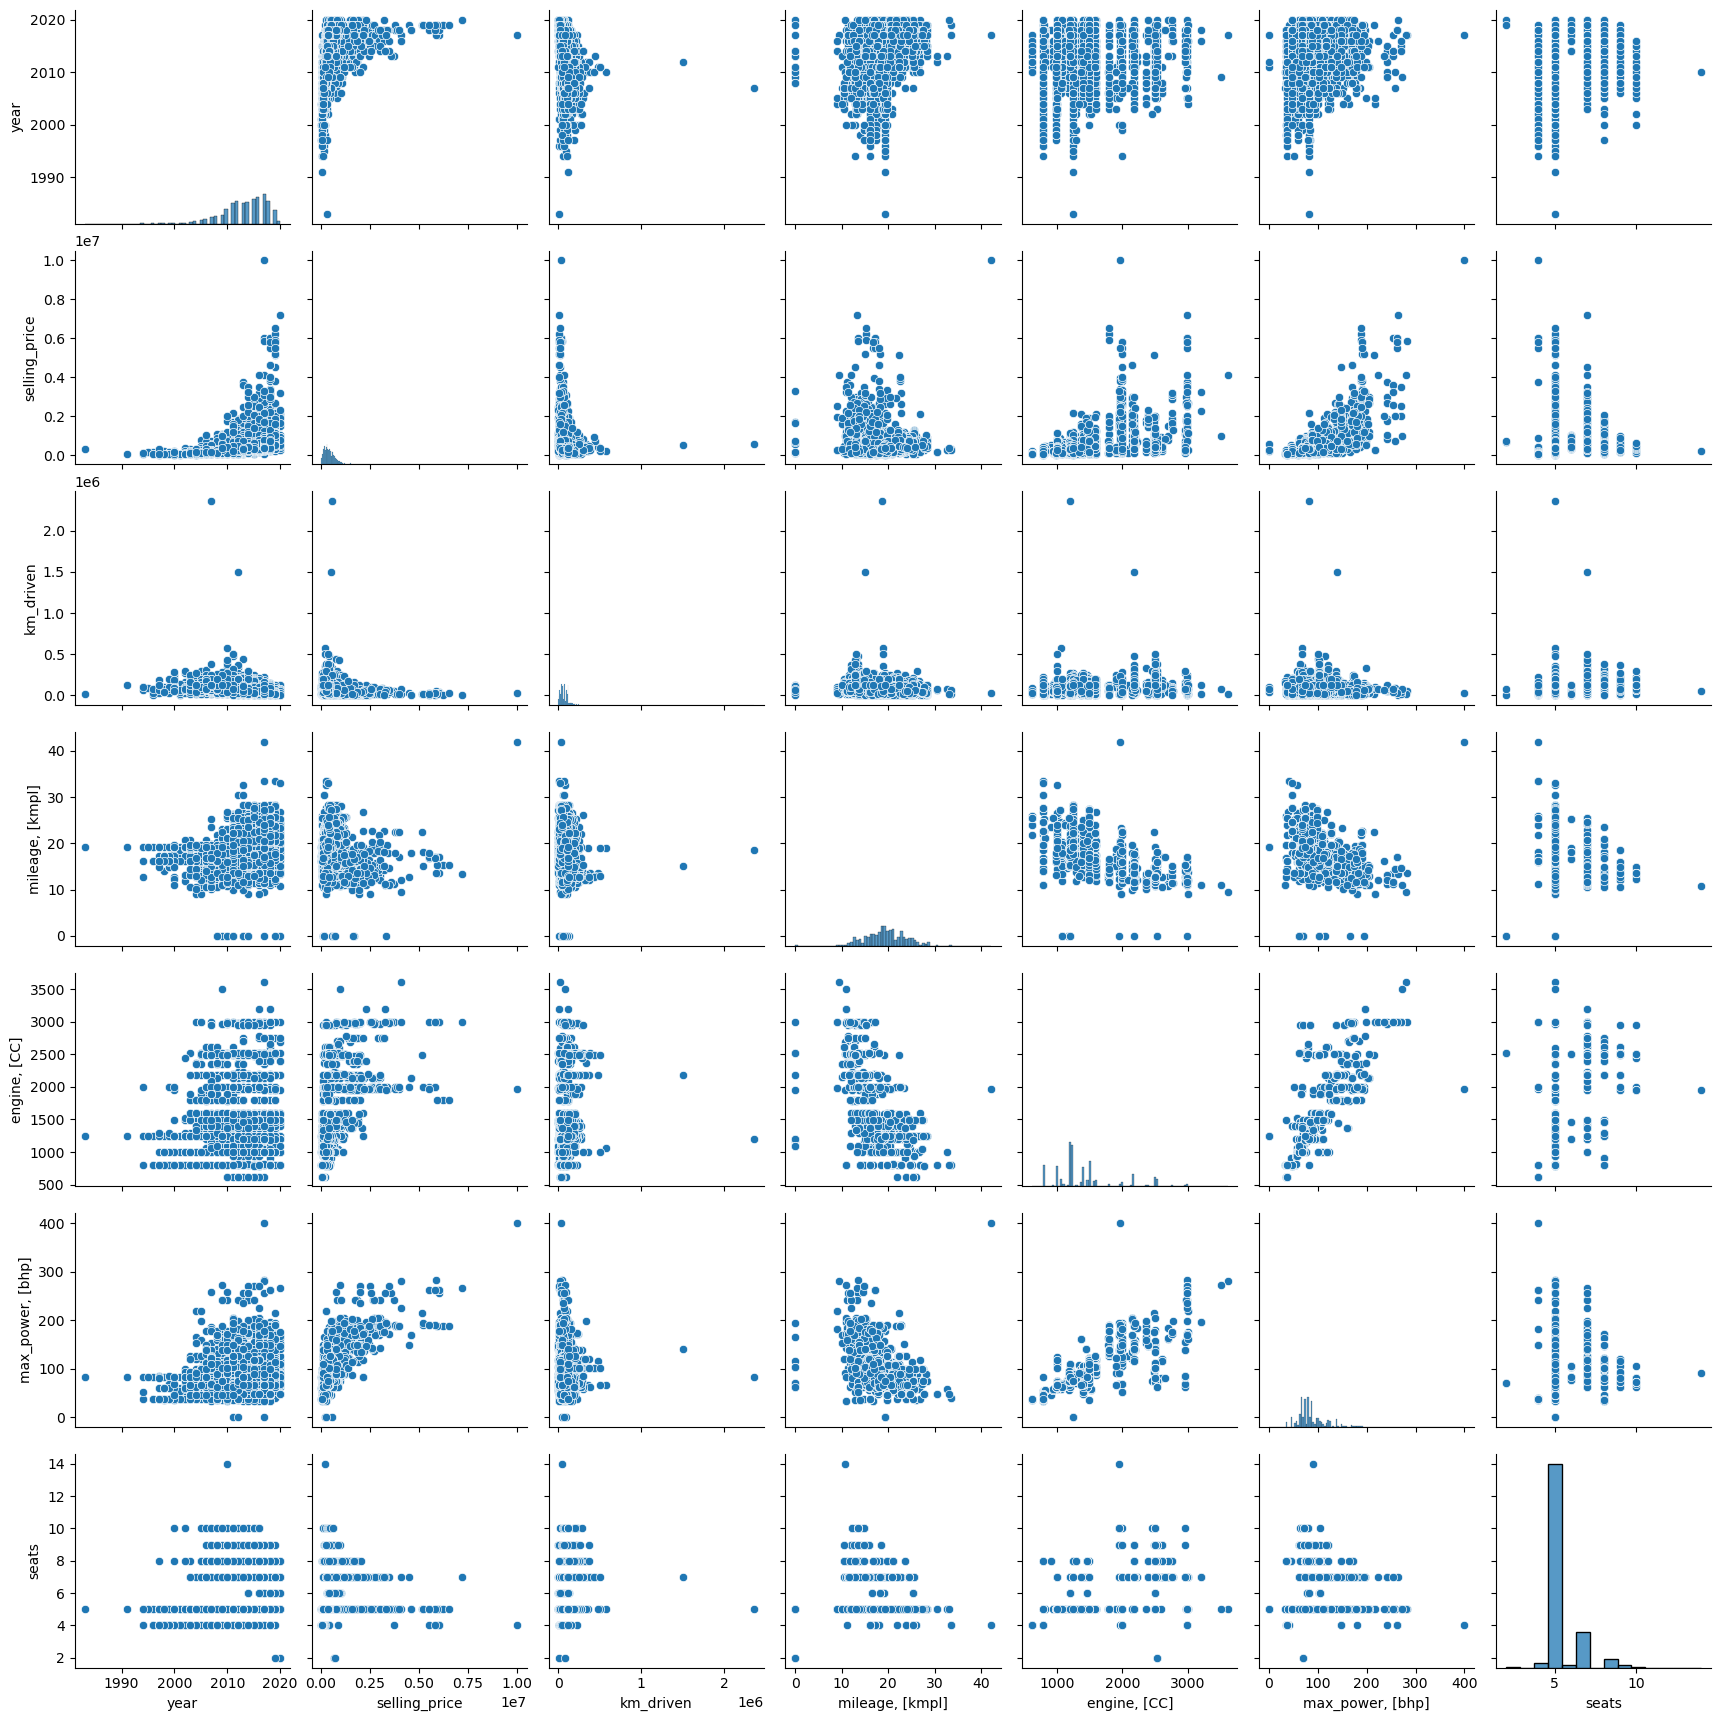

In [41]:
sns.pairplot(df_train)

### Предположения на основе распределений связь признаков с целевой переменной:
- Обратная зависимость между стоимостью авто (selling_price) и пробегом автомобиля (km_driven). Это вполне логично, чем больше проезжает автомобиль тем сильнее падает его стоимость.Не зря же машины, работавшие в такси, дешевые)
- Очевидная прямая зависимость между максимальной мощностью (max_power) и ценой авто (selling_price). Тоже ничего противоречащего не вижу. Чем больше мощность авто тем выше цена
- Еще вполне логичная связь наблюдается между годов выпуска авто(year) и ценой (selling_price). Чем новее тем дороже. Я думаю эта связь будет лучше отслеживаться если мы сгруппируем наши данные по маркам авто.
- Прямая связь наблюдается между объемом двигателя (engine) и его ценой. Чем больше объем двигателя следовательно цена будет выше.

### Гипотезы, предположенные на основе распределении, корреляции между признаками:
- Корреляцию можно наблюдать между объемом двигателя и мощностью авто. Ну да, чем больше объем тем больше его мощность (если конечно еще машина не турбированная=) )
- Наблюдается зависимость между пробегом авто и объемом его двигателя. Чем больше объем двигателя тем больше пробег. Можно предположить гипотезу что чем больше объем двигателя тем более живучий этот двигатель (мне самому в это слабо верится)
- Обратная связь наблюдается между годом выпуска автомобиля и его пробегом. Можно выдвинуть вполне очевидную гипотезу, что новые авто успевают проехать меньше
- Интересная обратная зависимость наблюдается между объемом двигателя и его запаса хода полного бака топлива (mileage, [kmpl]). Видимо чем больше объем двигателя, тем менее она экономичная.

C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Malik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

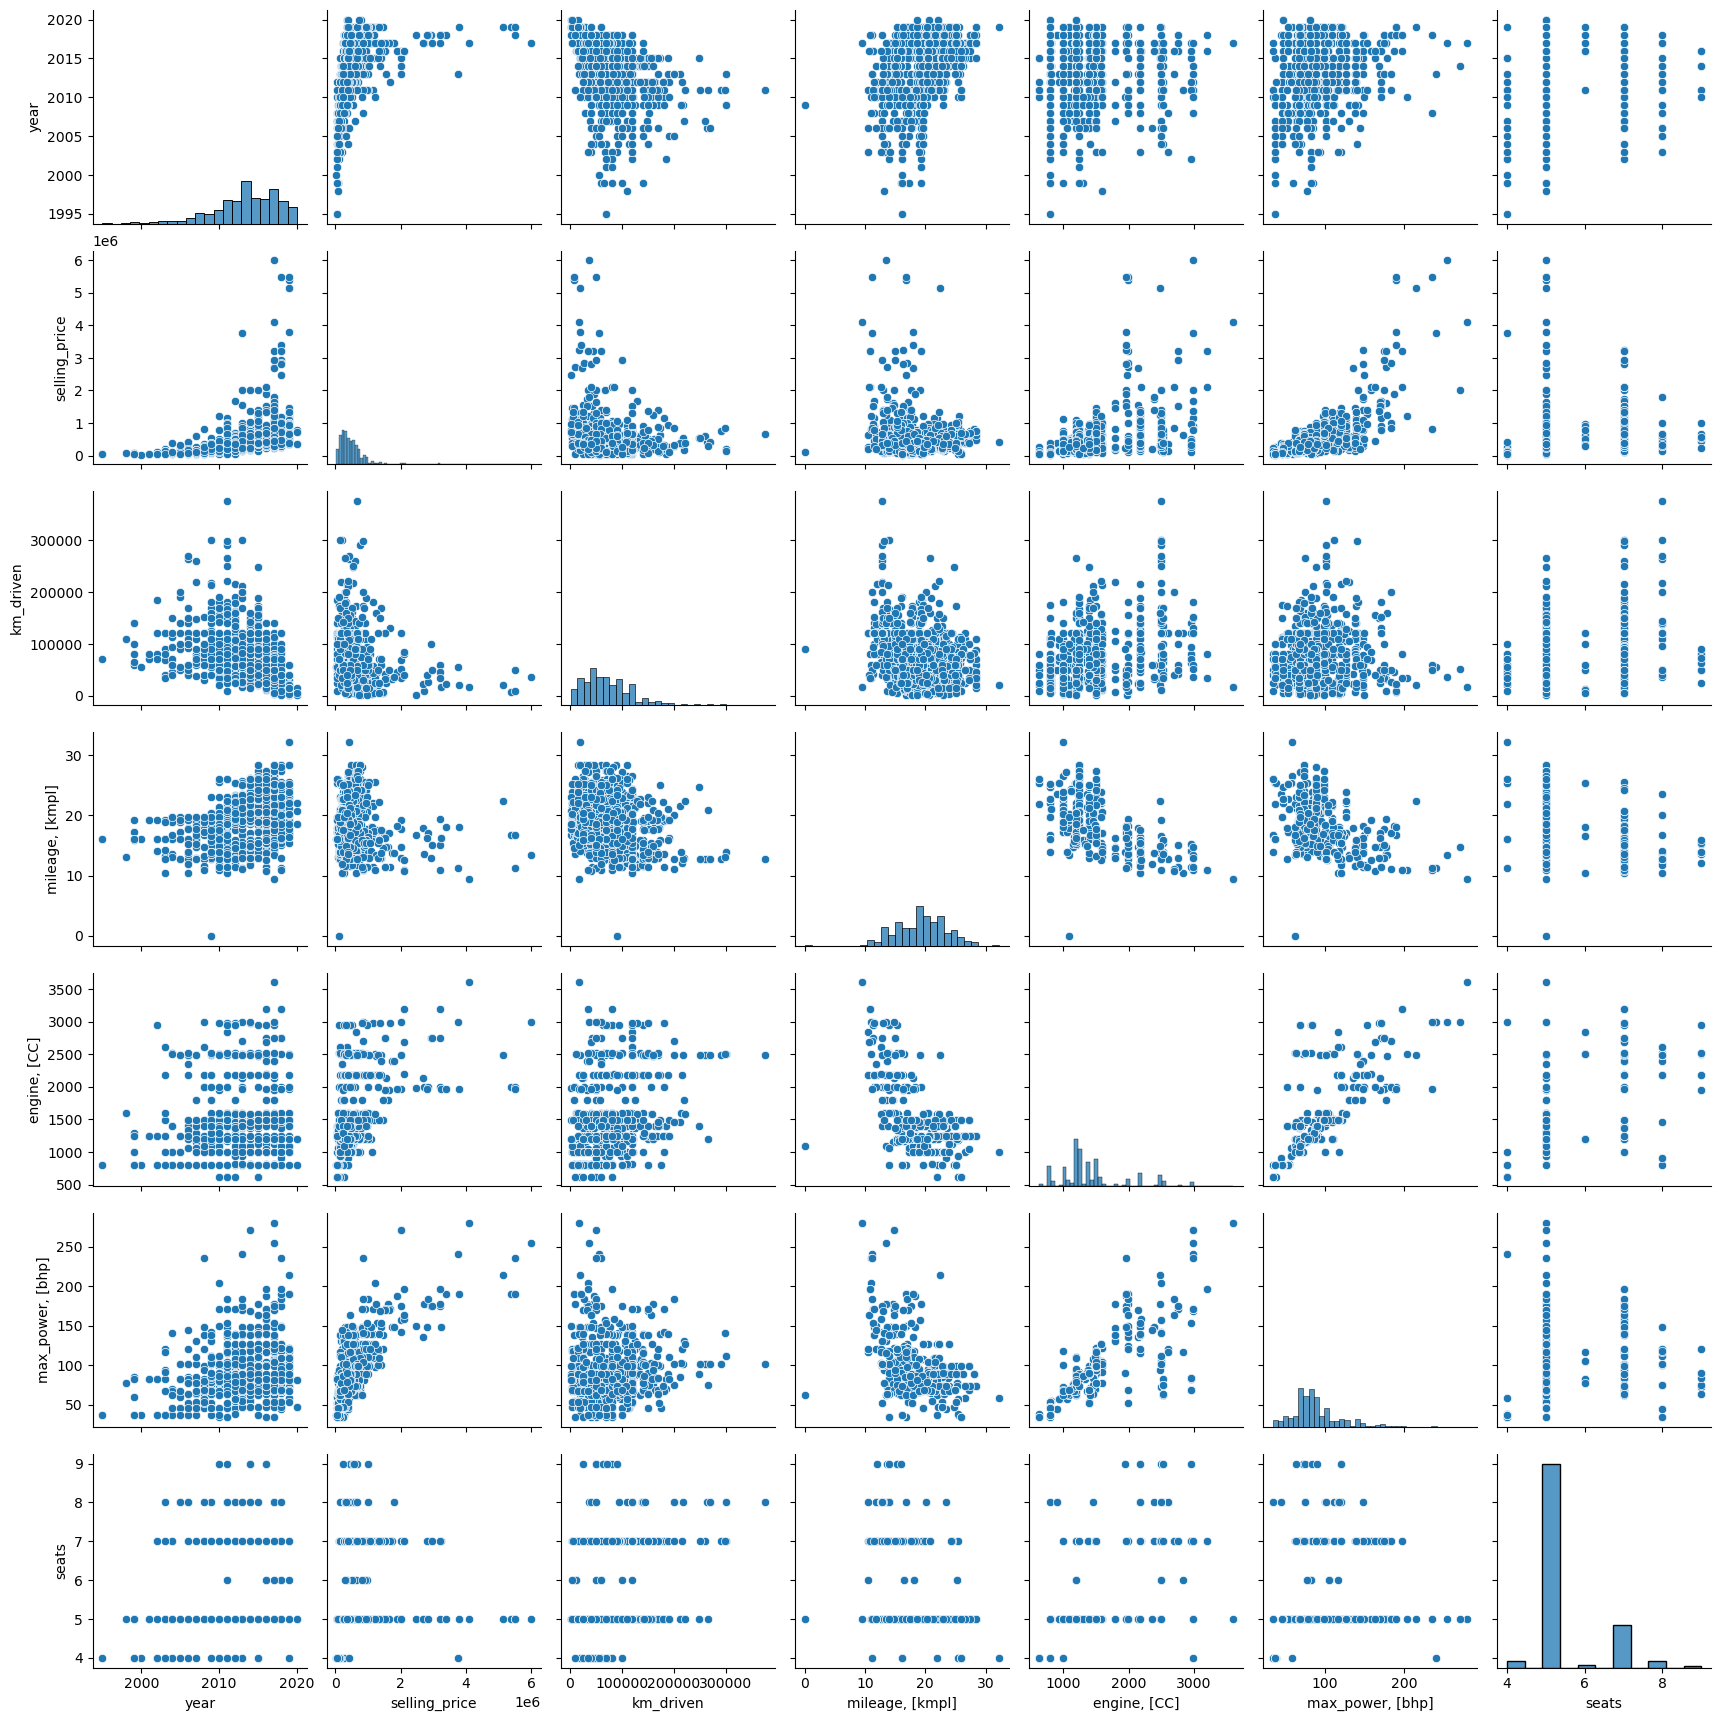

In [42]:
sns.pairplot(df_test)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [43]:
df_train.select_dtypes([int, float]).corr()

year  selling_price  km_driven  mileage, [kmpl]  \
year              1.000000       0.427279  -0.368966         0.342172   
selling_price     0.427279       1.000000  -0.164828        -0.104458   
km_driven        -0.368966      -0.164828   1.000000        -0.182245   
mileage, [kmpl]   0.342172      -0.104458  -0.182245         1.000000   
engine, [CC]      0.002819       0.447672   0.229766        -0.572677   
max_power, [bhp]  0.156648       0.692754   0.024630        -0.373271   
seats             0.041178       0.149953   0.192328        -0.450810   

                  engine, [CC]  max_power, [bhp]     seats  
year                  0.002819          0.156648  0.041178  
selling_price         0.447672          0.692754  0.149953  
km_driven             0.229766          0.024630  0.192328  
mileage, [kmpl]      -0.572677         -0.373271 -0.450810  
engine, [CC]          1.000000          0.681082  0.652172  
max_power, [bhp]      0.681082          1.000000  0.244060  
seats                 0.652172          0.244060  1.000000

<Axes: >

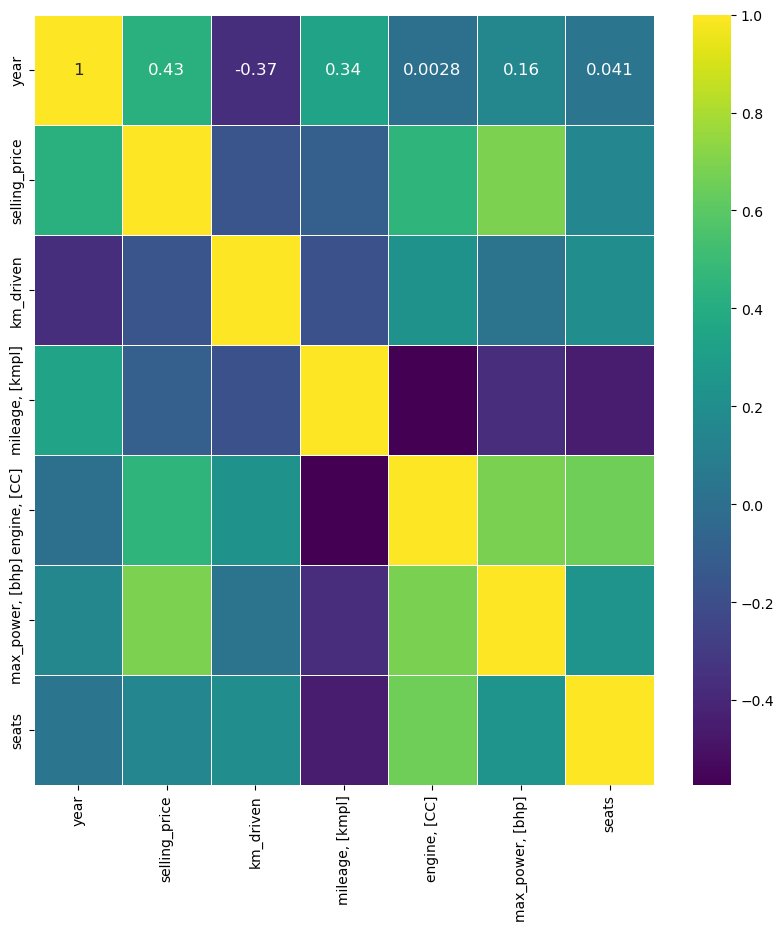

In [44]:
fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_train.select_dtypes([int, float]).corr(),
            linewidths=0.5, annot = True, cmap = 'viridis',
            linecolor='white', annot_kws = {'size':12})

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой признаки engine и year

Наиболее сильная положительная линейная зависимость наблюдается между признаками max_power и selling_price

Коэфициент корреляции между признаками year и km_driven = -0,37. Видим, что связь обратная, значит чем меньше год тем больше километраж. Похожая гипотеза была выдвинута выше.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Построим гистрограммы распределении и боксплоты для числовых признаков, это нам поможет визуально определить наличие выбросов в данных

0it [00:00, ?it/s]

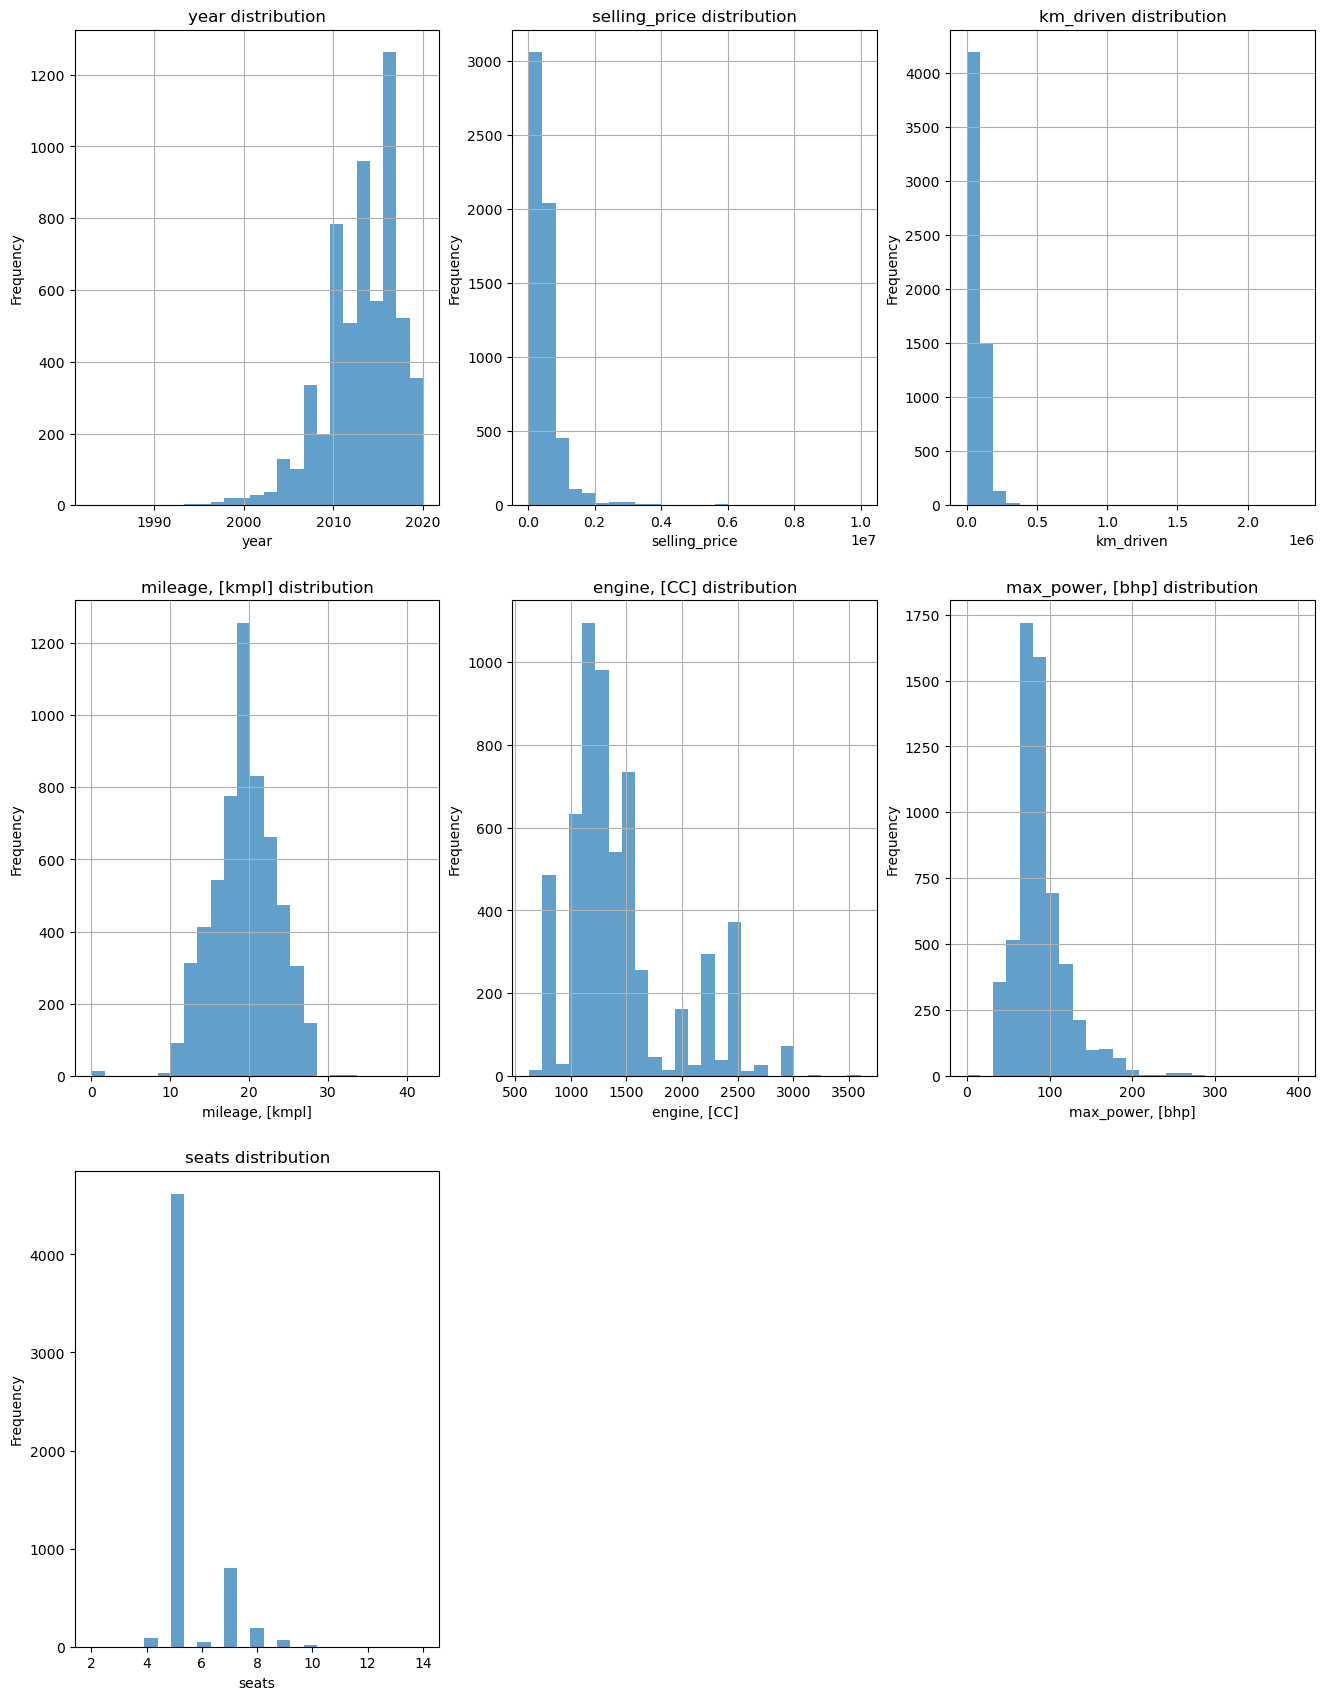

In [45]:
numeric_cols = df_train.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df_train[col], bins=25, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

0it [00:00, ?it/s]

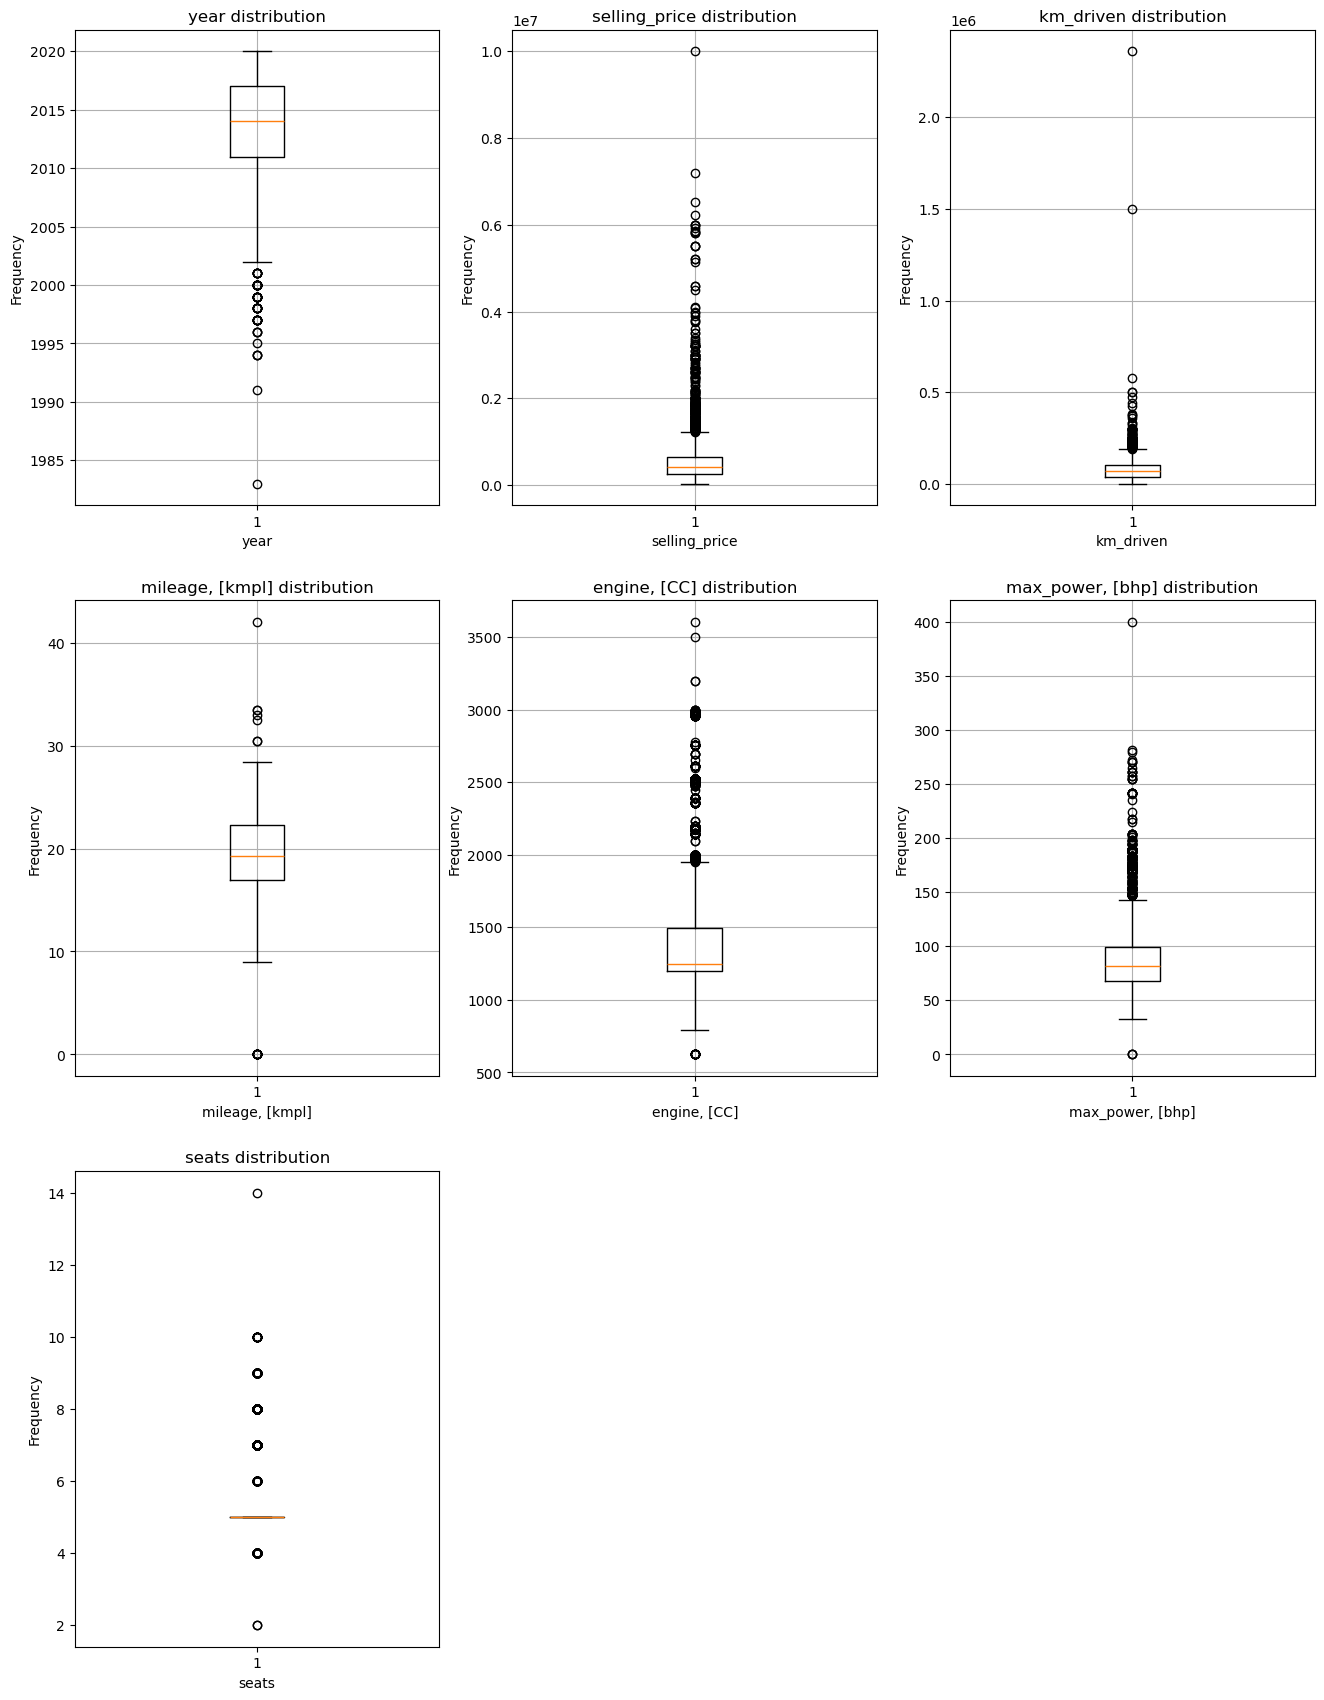

In [46]:
numeric_cols = df_train.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.boxplot(df_train[col])
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

Как можем увидеть из графиков представленных выше, в наших данных очень много выбросов.
По хорошему лучше от них избавиться. 

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [47]:
# Выберем из исходного датасета только числовые признаки
df_train_1 = df_train.select_dtypes([int, float])
df_test_1 = df_test.select_dtypes([int, float])

In [48]:
# Зададим целевую переменную, которую будем предсказывать 
y_train = df_train_1["selling_price"]
y_test = df_test_1["selling_price"]

In [49]:
#Создадим матрицы объекты-признаки
X_train = df_train_1.drop("selling_price", axis=1)
X_test = df_test_1.drop("selling_price", axis=1)

In [50]:
assert X_train.shape == (5840, 6)

In [51]:
#assert X_test.shape == (1000, 6)# Тут проверка не выполнятеся, так как я решил что необходимо удалить дубликаты на тестовых данных

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [53]:
# Обучаем модель на обучающей выборке
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# На тех же данных что и обучали сделаем предикт, и посчитаем ошибку на обучающей выборке
pred_train = lr.predict(X_train)
print(f'$R^2$ ошибки на обучающей выборке -> {r2_score(y_train, pred_train)}')
print(f'среднеквадратичная ошибка на обучающей выборке -> {MSE(y_train, pred_train)}')

$R^2$ ошибки на обучающей выборке -> 0.5922629595849876
среднеквадратичная ошибка на обучающей выборке -> 116873067751.52158


In [55]:
# Используем модель уже на тестовой выборке
pred_test = lr.predict(X_test)
print(f'$R^2$ ошибка на тестовой выборке -> {r2_score(y_test, pred_test)}')
print(f'среднеквадратичная ошибка на тестовой выборке -> {MSE(y_test, pred_test)}')

$R^2$ ошибка на тестовой выборке -> 0.6155109420188021
среднеквадратичная ошибка на тестовой выборке -> 137676071091.30597


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Приведем все независимые переменные к одной шкале
scaler = StandardScaler()
scaler.fit(X_train) # Обучаем стандартизатор на обучающей выборке
X_train_scaler = scaler.transform(X_train) # Тут уже все независимые переменные стандартизованны
X_test_scaler = scaler.transform(X_test)

In [58]:
# Еще раз обучаем линейную модель на стандартизованных переменных
lr2 = LinearRegression()
lr2.fit(X_train_scaler, y_train)

LinearRegression()

In [59]:
# Посмотрим как после стандартизации данных улучшилась модель на тренировочных данных
pred_train_scaler = lr2.predict(X_train_scaler)
print(f'$R^2$ ошибки на обучающей выборке, после стандартизации -> {r2_score(y_train, pred_train_scaler)}')
print(f'среднеквадратичная ошибка на обучающей выборке, после стандартизации -> {MSE(y_train, pred_train_scaler)}')

$R^2$ ошибки на обучающей выборке, после стандартизации -> 0.5922629595849875
среднеквадратичная ошибка на обучающей выборке, после стандартизации -> 116873067751.52162


In [60]:
# Предсказание модели на тестовой выборке, после стандартизации
pred_test_scaler = lr2.predict(X_test_scaler)
print(f'$R^2$ ошибки на тестовой выборке, после стандартизации -> {r2_score(y_test, pred_test_scaler)}')
print(f'среднеквадратичная ошибка на тестовой выборке, после стандартизации -> {MSE(y_test, pred_test_scaler)}')

$R^2$ ошибки на тестовой выборке, после стандартизации -> 0.6155109420188098
среднеквадратичная ошибка на тестовой выборке, после стандартизации -> 137676071091.30316


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([-44148.04751104,  -7455.27243635,  29237.50263834,  65930.27771303,
        102623.05278771, 139315.8278624 , 176008.60293709, 212701.37801178,
        249394.15308646, 286086.92816115, 322779.70323584]),
 <BarContainer object of 10 artists>)

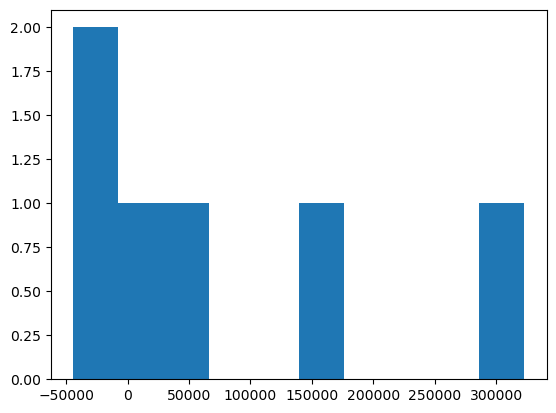

In [61]:
from matplotlib import pyplot as plt
plt.hist(lr2.coef_)

In [62]:
# Отобразим значения весов в линейной модели
weights = lr2.coef_
print(weights)

[152843.26235772 -44148.04751104  28781.08659475  61176.85714999
 322779.70323584 -23220.5702262 ]


In [63]:
max_abs_value = max(weights, key=abs)
print(max_abs_value)

322779.7032358399


In [64]:
X_train.columns

Index(['year', 'km_driven', 'mileage, [kmpl]', 'engine, [CC]',
       'max_power, [bhp]', 'seats'],
      dtype='object')

Мы можем сравнить максимальное по модулю значение веса, с соответствующей с ним названием признака. Самый важный признак в предсказании стоимости автомобиля является признак max_power (мощность авто).

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [65]:
from sklearn.linear_model import Lasso

In [66]:
# Обучение модели на тренировочных данных 
lr3 = Lasso()
lr3.fit(X_train_scaler, y_train)

Lasso()

In [67]:
# Качество модели на тренировочных данных
pred_train_lasso = lr3.predict(X_train_scaler)
print(f'$R^2$ ошибки на обучающей выборке, Lasso -> {r2_score(y_train, pred_train_lasso)}')
print(f'среднеквадратичная ошибка на обучающей выборке, Lasso -> {MSE(y_train, pred_train_lasso)}')

$R^2$ ошибки на обучающей выборке, Lasso -> 0.5922629595497046
среднеквадратичная ошибка на обучающей выборке, Lasso -> 116873067761.63501


In [68]:
# Качество модели на тестовых данных
pred_test_lasso = lr3.predict(X_test_scaler)
print(f'$R^2$ ошибка на тестовой выборке, Lasso -> {r2_score(y_test, pred_test_lasso)}')
print(f'среднеквадратичная ошибка на тестовой выборке, Lasso -> {MSE(y_test, pred_test_lasso)}')

$R^2$ ошибка на тестовой выборке, Lasso -> 0.6155104915724257
среднеквадратичная ошибка на тестовой выборке, Lasso -> 137676232385.0699


In [69]:
# Отобразим значения весов в Lasso
weights = lr3.coef_
print(weights)

[152843.08385345 -44146.91853785  28779.20408499  61172.02578008
 322780.58619708 -23217.69327311]


Как мы можем увидеть, алгоритм Lasso не сильно то и улучшила результат. Да и коэффициенты она не занулила. Я думаю это связано с тем что этогт алгоритм зануляет те веса которые близки к нулю. У нас же все веса сильно отличаются от нуля. 

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
lasso = Lasso()

In [72]:
#Параметры для подбора: альфа (коэффициент регуляризации)
param_grid = {
    "alpha": [0.1, 1, 10, 100]
}

In [73]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)

In [74]:
# Обучение модели
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [75]:
#Лучшие параметры и резульлтаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

Лучшие параметры: {'alpha': 100}
Лучшая оценка: 0.5682328004899914


In [76]:
# Обучение Lasso модели при найдем нами значении параметра alpha
lasso_modif = Lasso(alpha = 100) # Задаем нашу модель с параметром alpha = 100
lasso_modif.fit(X_train_scaler, y_train) # Обучаем модель на тренировочных данных
pred_test_lasso_modif = lasso_modif.predict(X_test_scaler) # Предсказание на тестовой выборке 
print(f'$R^2$ ошибка на тестовой выборке, Lasso -> {r2_score(y_test, pred_test_lasso_modif)}')
print(f'среднеквадратичная ошибка на тестовой выборке, Lasso -> {MSE(y_test, pred_test_lasso_modif)}')

$R^2$ ошибка на тестовой выборке, Lasso -> 0.6154653915762605
среднеквадратичная ошибка на тестовой выборке, Lasso -> 137692381583.98557


In [77]:
# Поглядим на веса получившейся модели (Как мы увидим веса не обнулились)
lasso_modif.coef_

array([152819.5529717 , -44037.83207098,  28601.04061998,  60701.69450513,
       322866.99092623, -22933.37348536])

Для оптимизации мы выбрали модель Lasso-регрессию. GridSearchCV проводит кросс-валидацию для каждого сочетания параметров из заданной сетки. В нашем случае он делит данные на 10 фолдов, и каждый раз обучает модель на 9 фолдах и тестирует на оставшемся фолде. Этот процесс повторяется 10 раз, и результаты метрики точности усредняется.После заврешения кросс-валидации, GridSearchCV вычисляет среднюю оценку для каждого значения гипермпараметра, и в конечном итоге нам выдает ту в котором она получила наименьшую ошибку.В общем случае у нас 4 значения гиперпараметра и 10 значении фолдов, значит GridSearchCV обучила всего 40 раз модель. 

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [78]:
from sklearn.linear_model import ElasticNet

In [79]:
elastiknet = ElasticNet()

In [80]:
#Параметры для подбора: альфа (коэффициент регуляризации)
param_grid = {
    "alpha": [0.1, 1, 10, 100]
}

In [81]:
# Создание объекта GridSearchCV
grid_search_el = GridSearchCV(estimator=elastiknet, param_grid=param_grid, cv=10)

In [82]:
# Обучение модели
grid_search_el.fit(X_train_scaler, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 100]})

In [83]:
#Лучшие параметры и резульлтаты
print("Лучшие параметры:", grid_search_el.best_params_)
print("Лучшая оценка:", grid_search_el.best_score_)

Лучшие параметры: {'alpha': 0.1}
Лучшая оценка: 0.5735739357993825


In [84]:
# Обучим модель с подобранным гиперпараметром 
elstiknet_modif = ElasticNet(alpha=0.1)
elstiknet_modif.fit(X_train_scaler, y_train) # Обучаем модель на тренировочных данных
pred_test_elastiknet_modif = elstiknet_modif.predict(X_test_scaler) # Предсказание на тестовой выборке 
print(f'$R^2$ ошибка на тестовой выборке, elastiknet -> {r2_score(y_test, pred_test_elastiknet_modif)}')
print(f'среднеквадратичная ошибка на тестовой выборке, elastiknet -> {MSE(y_test, pred_test_elastiknet_modif)}')

$R^2$ ошибка на тестовой выборке, elastiknet -> 0.610146535086225
среднеквадратичная ошибка на тестовой выборке, elastiknet -> 139596933219.58084


In [85]:
# Поглядим на веса получившейся модели (Как мы увидим веса не обнулились)
elstiknet_modif.coef_

array([149645.64532216, -45434.55120527,  25659.6118334 ,  73123.44362631,
       299494.8817297 , -25101.85815633])

По аналлогии с предыдущим пунком грид сёрч тут также пришлос обучать модель 4*10=40 раз

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.

### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [86]:
# Удаление столбца name
df_train = df_train.drop(columns=["name"])
df_test = df_test.drop(columns=["name"])

In [87]:
# Зададим обучающую выборку, удалив в ней целевую переменную
X_train_cat = df_train.copy()
X_train_cat = X_train_cat.drop(columns=["selling_price"])
X_test_cat = df_test.copy()
X_test_cat = X_test_cat.drop(columns=["selling_price"])

In [88]:
assert X_train_cat.shape == (5840, 10)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [89]:
from sklearn.preprocessing import OneHotEncoder 

In [90]:
cat_features = ["fuel", "seller_type", "transmission", "owner", "seats"]
encoded_train_features = []
encoded_test_features = []
for feature in cat_features:
    encoded = OneHotEncoder()
    train_enc = encoded.fit_transform(X_train_cat[feature].values.reshape(-1, 1)).toarray()
    test_enc = encoded.transform(X_test_cat[feature].values.reshape(-1, 1)).toarray()
    n = X_train_cat[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_train_df = pd.DataFrame(train_enc, columns=cols)
    encoded_test_df = pd.DataFrame(test_enc, columns=cols)
    encoded_train_df.index = X_train_cat.index
    encoded_test_df.index = X_test_cat.index
    encoded_train_features.append(encoded_train_df)
    encoded_test_features.append(encoded_test_df)

In [91]:
X_train_cat = pd.concat([X_train_cat, *encoded_train_features[:]], axis=1)
X_test_cat = pd.concat([X_test_cat, *encoded_test_features[:]], axis=1)

In [92]:
# Удаление ненужных столбцов на трейне
drop_cols = ["fuel", "seller_type", "transmission", "owner", "seats", "fuel_1", "seller_type_1",
            "transmission_1", "owner_1", "seats_1"]
X_train_cat.drop(columns = drop_cols, inplace=True)
X_test_cat.drop(columns = drop_cols, inplace=True)

In [93]:
X_test_cat

year  km_driven  mileage, [kmpl]  engine, [CC]  max_power, [bhp]  fuel_2  \
0    2010     168000            14.00          2498            112.00     1.0   
1    2017      25000            21.50          1497            108.50     1.0   
2    2007     218463            12.90          1799            130.00     0.0   
3    2015     173000            25.10          1498             98.60     1.0   
4    2011      70000            16.50          1172             65.00     0.0   
..    ...        ...              ...           ...               ...     ...   
926  2008     100000            19.81          1086             68.05     0.0   
927  2017      50000            18.60          1197             81.83     0.0   
928  2009      40000            23.00          1396             90.00     1.0   
929  2012      25000            20.36          1197             78.90     0.0   
930  2016     110000            26.00          1498             98.60     1.0   

     fuel_3  fuel_4  seller_type_2  seller_type_3  ...  owner_4  owner_5  \
0       0.0     0.0            1.0            0.0  ...      0.0      0.0   
1       0.0     0.0            1.0            0.0  ...      0.0      0.0   
2       0.0     1.0            1.0            0.0  ...      0.0      0.0   
3       0.0     0.0            1.0            0.0  ...      0.0      0.0   
4       0.0     1.0            1.0            0.0  ...      0.0      0.0   
..      ...     ...            ...            ...  ...      ...      ...   
926     0.0     1.0            1.0            0.0  ...      0.0      0.0   
927     0.0     1.0            1.0            0.0  ...      0.0      0.0   
928     0.0     0.0            1.0            0.0  ...      0.0      0.0   
929     0.0     1.0            1.0            0.0  ...      0.0      0.0   
930     0.0     0.0            1.0            0.0  ...      0.0      0.0   

     seats_2  seats_3  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  
0        0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0  
1        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
2        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
3        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
4        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
..       ...      ...      ...      ...      ...      ...      ...      ...  
926      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
927      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
928      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
929      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
930      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  

[931 rows x 23 columns]

In [94]:
X_train_cat

year  km_driven  mileage, [kmpl]  engine, [CC]  max_power, [bhp]  \
0     2014     145500            23.40          1248             74.00   
1     2014     120000            21.14          1498            103.52   
2     2010     127000            23.00          1396             90.00   
3     2007     120000            16.10          1298             88.20   
4     2017      45000            20.14          1197             81.86   
...    ...        ...              ...           ...               ...   
5835  2008     191000            17.92          1086             62.10   
5836  2013      50000            18.90           998             67.10   
5837  2013     110000            18.50          1197             82.85   
5838  2007     119000            16.80          1493            110.00   
5839  2009     120000            19.30          1248             73.90   

      fuel_2  fuel_3  fuel_4  seller_type_2  seller_type_3  ...  owner_4  \
0        1.0     0.0     0.0            1.0            0.0  ...      0.0   
1        1.0     0.0     0.0            1.0            0.0  ...      0.0   
2        1.0     0.0     0.0            1.0            0.0  ...      0.0   
3        0.0     0.0     1.0            1.0            0.0  ...      0.0   
4        0.0     0.0     1.0            1.0            0.0  ...      0.0   
...      ...     ...     ...            ...            ...  ...      ...   
5835     0.0     0.0     1.0            1.0            0.0  ...      0.0   
5836     0.0     0.0     1.0            1.0            0.0  ...      0.0   
5837     0.0     0.0     1.0            1.0            0.0  ...      0.0   
5838     1.0     0.0     0.0            1.0            0.0  ...      0.0   
5839     1.0     0.0     0.0            1.0            0.0  ...      0.0   

      owner_5  seats_2  seats_3  seats_4  seats_5  seats_6  seats_7  seats_8  \
0         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
5835      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
5836      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
5837      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
5838      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
5839      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   

      seats_9  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
5835      0.0  
5836      0.0  
5837      0.0  
5838      0.0  
5839      0.0  

[5840 rows x 23 columns]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [95]:
from sklearn.linear_model import Ridge

In [96]:
ridge = Ridge()

In [97]:
param_grid = {
    "alpha": [0.1, 1, 10, 100]
}

In [98]:
grid_search_ridge = GridSearchCV(estimator=ridge, scoring="r2", param_grid=param_grid, cv=10)

In [99]:
grid_search_ridge.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='r2')

In [100]:
#Лучшие параметры и резульлтаты
print("Лучшие параметры:", grid_search_ridge.best_params_)
print("Лучшая оценка:", grid_search_ridge.best_score_)

Лучшие параметры: {'alpha': 10}
Лучшая оценка: 0.6218786196491047


In [101]:
# Обучим модель на подобранном гиперпараметре 
ridge_modif = Ridge(alpha = 10)
ridge_modif.fit(X_train_cat, y_train) # Обучаем модель на тренировочных данных
pred_test_ridge_modif = ridge_modif.predict(X_test_cat) # Предсказание на тестовой выборке 
print(f'$R^2$ ошибка на тестовой выборке, elastiknet -> {r2_score(y_test, pred_test_ridge_modif)}')
print(f'среднеквадратичная ошибка на тестовой выборке, elastiknet -> {MSE(y_test, pred_test_ridge_modif)}')

$R^2$ ошибка на тестовой выборке, elastiknet -> 0.6603241784126858
среднеквадратичная ошибка на тестовой выборке, elastiknet -> 121629553793.80322


Преобразование категориальных признаков улучшило нашу модель. Теперь доля дисперсии целевой переменной равна 0,62 (для идеальной модели она равна 1)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [102]:
def business_metric(y_true, y_pred):
    # Преобразуем наши метки в numpy массив
    y_true_array = y_true.to_numpy()
    s = 0
    for i in range(len(y_true_array)):
        if abs(y_true_array[i] - y_pred[i]) <= y_true_array[i]*0.1:
            s += 1
    return s/len(y_true_array)

#business_metric(# your code here)

In [103]:
business_metric(y_test, pred_test_lasso)

0.23523093447905477

Посчитаем бизнесовую метрику для всех раннее обученных моделей.

In [104]:
print(f"линейная регрессия -> {business_metric(y_test, pred_test)}")
print(f"линейная регрессия после стандартизации данных -> {business_metric(y_test, pred_test_scaler)}")
print(f"Lasso регрессия -> {business_metric(y_test, pred_test_lasso)}")
print(f"Lasso регрессия с подобранным гиперпараметром -> {business_metric(y_test, pred_test_lasso_modif)}")
print(f"elastiknet регрессия с подобранным гиперпараметром -> {business_metric(y_test, pred_test_elastiknet_modif)}")
print(f"Ridge регрессия с подобранным гиперпараметром и с обработкой категориальных признаков -> {business_metric(y_test, pred_test_ridge_modif)}")

линейная регрессия -> 0.23523093447905477
линейная регрессия после стандартизации данных -> 0.23523093447905477
Lasso регрессия -> 0.23523093447905477
Lasso регрессия с подобранным гиперпараметром -> 0.23523093447905477
elastiknet регрессия с подобранным гиперпараметром -> 0.23093447905477982
Ridge регрессия с подобранным гиперпараметром и с обработкой категориальных признаков -> 0.24704618689581095


Самый лучший результат показал Ridge регрессия с подобранным гиперпарамет

In [105]:
ridge_modif

Ridge(alpha=10)

In [106]:
from joblib import dump
dump(ridge_modif, 'ridge_modif.joblib')

['ridge_modif.joblib']

In [107]:
X_test_cat

year  km_driven  mileage, [kmpl]  engine, [CC]  max_power, [bhp]  fuel_2  \
0    2010     168000            14.00          2498            112.00     1.0   
1    2017      25000            21.50          1497            108.50     1.0   
2    2007     218463            12.90          1799            130.00     0.0   
3    2015     173000            25.10          1498             98.60     1.0   
4    2011      70000            16.50          1172             65.00     0.0   
..    ...        ...              ...           ...               ...     ...   
926  2008     100000            19.81          1086             68.05     0.0   
927  2017      50000            18.60          1197             81.83     0.0   
928  2009      40000            23.00          1396             90.00     1.0   
929  2012      25000            20.36          1197             78.90     0.0   
930  2016     110000            26.00          1498             98.60     1.0   

     fuel_3  fuel_4  seller_type_2  seller_type_3  ...  owner_4  owner_5  \
0       0.0     0.0            1.0            0.0  ...      0.0      0.0   
1       0.0     0.0            1.0            0.0  ...      0.0      0.0   
2       0.0     1.0            1.0            0.0  ...      0.0      0.0   
3       0.0     0.0            1.0            0.0  ...      0.0      0.0   
4       0.0     1.0            1.0            0.0  ...      0.0      0.0   
..      ...     ...            ...            ...  ...      ...      ...   
926     0.0     1.0            1.0            0.0  ...      0.0      0.0   
927     0.0     1.0            1.0            0.0  ...      0.0      0.0   
928     0.0     0.0            1.0            0.0  ...      0.0      0.0   
929     0.0     1.0            1.0            0.0  ...      0.0      0.0   
930     0.0     0.0            1.0            0.0  ...      0.0      0.0   

     seats_2  seats_3  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  
0        0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0  
1        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
2        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
3        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
4        0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
..       ...      ...      ...      ...      ...      ...      ...      ...  
926      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
927      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
928      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
929      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  
930      0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0  

[931 rows x 23 columns]

In [111]:
len(pred_test_ridge_modif[pred_test_ridge_modif<0])

62